#  Delivery_time -> Predict delivery time using sorting time 

In [ ]:
# Salary_hike -> Build a prediction model for Salary_hik

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
# import dataset
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# #EDA and Data Visualization


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\BusinessComputers.in\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

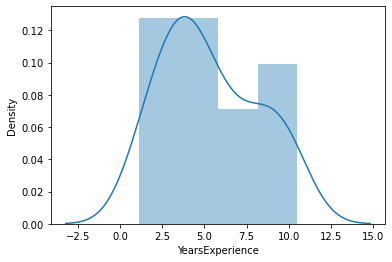

In [6]:
sns.distplot(dataset['YearsExperience'])

C:\Users\BusinessComputers.in\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

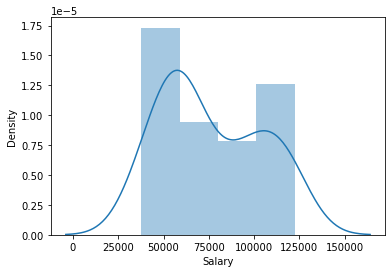

In [7]:
sns.distplot(dataset['Salary'])

# coloumn renaiming 

In [10]:
dataset=dataset.rename({'YearsExperience':'Exp', 'Salary':'Sal'},axis=1)
dataset

,Experience,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [11]:
dataset.corr()

,Experience,Sal
Experience,1.000000,0.978242
Sal,0.978242,1.000000


<AxesSubplot:xlabel='Experience', ylabel='Sal'>

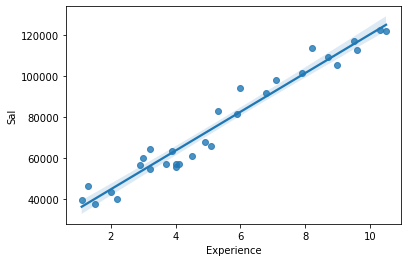

In [12]:
sns.regplot(x=dataset['Experience'],y=dataset['Sal'])

# Model building

In [21]:
model=smf.ols("Sal~Experience",data=dataset).fit()

In [22]:
model.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

In [23]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept     11.346940
 Experience    24.950094
 dtype: float64,
 Intercept     5.511950e-12
 Experience    1.143068e-20
 dtype: float64)

In [24]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [25]:
# Manual prediction for say 5 years experince
Experience = (25792.200) + (9449.96)*(5)
Experience

73042.0

In [26]:
# Automatic Prediction for say 5, 7 expeience
new_data=pd.Series([5,7])
new_data

0    5
1    7
dtype: int64

In [29]:
data_pred=pd.DataFrame(new_data,columns=['Experience'])
data_pred

,Experience
0,5
1,7


In [30]:
model.predict(data_pred)

0    73042.011806
1    91941.936449
dtype: float64